# Round 3. Apply K-fold 

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [10]:
#The objective is to provide a confidence interval for the performance 
#of our model using K-fold cross validation



In [15]:
churnData2=pd.read_csv('churnData2')
churnData2.shape

(7043, 6)

In [12]:
churnData2.drop(['Unnamed: 0'], axis = 1, inplace = True) 
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [13]:
#For it we need check if the values of the 'Churn' feature are balanced
churnData2['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
# As we can see there is a huge imbalance in the data in the representation
# of the two categories. Category 0 is represented 5174 times and category 1 is represented 1869 times.


## Let's try downsampling and upsampling to create a balance between the two classes

### Downsampling


In [22]:
category_0 = churnData2[churnData2['Churn'] == 0]
category_1 = churnData2[churnData2['Churn'] == 1]


In [23]:
print(category_0.shape)
print(category_1.shape)

(5174, 6)
(1869, 6)


In [24]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 6)
(1869, 6)


In [25]:
churnData2 = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
churnData2 = churnData2.sample(frac=1)
churnData2['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [26]:
churnData2

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
2900,2900,1,1,69.25,69.25,1
4239,4239,0,56,36.10,1971.50,0
4960,4960,1,50,95.70,4816.70,1
5641,5641,0,39,25.45,958.45,0
4657,4657,0,42,25.10,1097.15,0
...,...,...,...,...,...,...
5856,5856,0,11,44.65,472.25,0
4551,4551,0,56,96.95,5432.20,0
857,857,0,1,50.80,50.80,1
3732,3732,0,23,77.15,1759.40,0


In [27]:
churnData2.drop(['Unnamed: 0'], axis = 1, inplace = True) 
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
2900,1,1,69.25,69.25,1
4239,0,56,36.10,1971.50,0
4960,1,50,95.70,4816.70,1
5641,0,39,25.45,958.45,0
4657,0,42,25.10,1097.15,0
...,...,...,...,...,...
5856,0,11,44.65,472.25,0
4551,0,56,96.95,5432.20,0
857,0,1,50.80,50.80,1
3732,0,23,77.15,1759.40,0


### Upsampling Method 1

In [30]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 6)


In [31]:
category_1_up

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3006,3006,1,14,74.95,1036.75,1
5300,5300,0,1,80.05,80.05,1
2185,2185,0,24,54.75,1338.15,1
857,857,0,1,50.80,50.80,1
1053,1053,0,5,39.50,210.75,1
...,...,...,...,...,...,...
2721,2721,1,10,79.25,793.55,1
3078,3078,1,2,85.55,187.45,1
5812,5812,0,1,71.00,71.00,1
6953,6953,1,13,82.00,1127.20,1


In [32]:
category_1_up.shape

(5174, 6)

In [35]:
churnData3 = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
churnData3 = churnData3.sample(frac=1)
churnData3['Churn'].value_counts()
churnData3

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3126,3126,0,26,38.85,1025.15,0
4599,4599,0,52,50.95,2610.65,0
1578,1578,0,7,59.50,415.95,1
2152,2152,0,1,50.10,50.10,0
6772,6772,0,38,62.30,2354.80,1
...,...,...,...,...,...,...
3565,3565,0,1,50.75,50.75,1
4343,4343,1,8,75.75,606.25,1
402,402,0,69,99.45,7007.60,1
4238,4238,0,57,19.40,1061.60,0


In [59]:
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
2900,1,1,69.25,69.25,1
4239,0,56,36.10,1971.50,0
4960,1,50,95.70,4816.70,1
5641,0,39,25.45,958.45,0
4657,0,42,25.10,1097.15,0
...,...,...,...,...,...
5856,0,11,44.65,472.25,0
4551,0,56,96.95,5432.20,0
857,0,1,50.80,50.80,1
3732,0,23,77.15,1759.40,0


In [36]:
churnData3.drop(['Unnamed: 0'], axis = 1, inplace = True) 
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3126,0,26,38.85,1025.15,0
4599,0,52,50.95,2610.65,0
1578,0,7,59.50,415.95,1
2152,0,1,50.10,50.10,0
6772,0,38,62.30,2354.80,1
...,...,...,...,...,...
3565,0,1,50.75,50.75,1
4343,1,8,75.75,606.25,1
402,0,69,99.45,7007.60,1
4238,0,57,19.40,1061.60,0


## Cross Validation applying K-fold 

###  ChurnData2 (Downsampling)

In [62]:
#Define the target variable before de scale
X=churnData2.drop('Churn', axis=1)
y=churnData2.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### Fit a Decision Tree Classifier on the training data 

,Error_metric,Train,Test
0,Accuracy,0.725535,0.736185
1,Precision,0.701543,0.691843
2,Recall,0.793025,0.832727


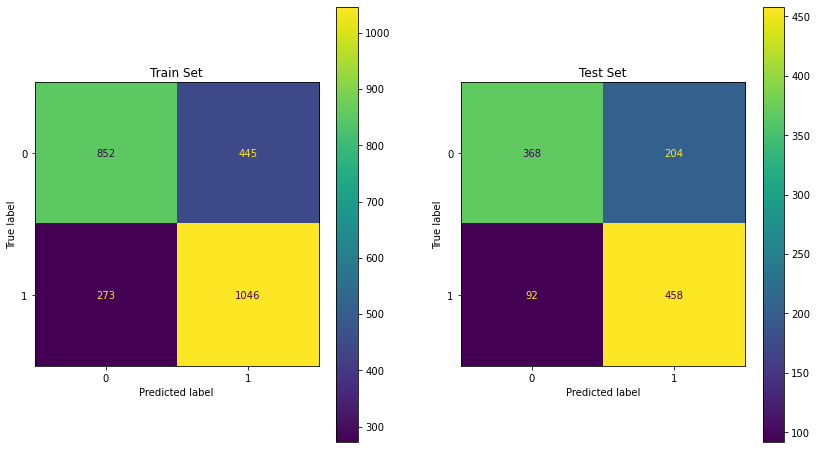

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


In [76]:
#After de downsampling we see an improvement in Accuracy, Precision and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [74]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.72394755, 0.69565217, 0.73084886, 0.73411602, 0.74378453])

###  ChurnData3 (Upsampling)

In [66]:
#Define the target variable before de scale
X=churnData3.drop('Churn', axis=1)
y=churnData3.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [67]:
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3126,0,26,38.85,1025.15,0
4599,0,52,50.95,2610.65,0
1578,0,7,59.50,415.95,1
2152,0,1,50.10,50.10,0
6772,0,38,62.30,2354.80,1
...,...,...,...,...,...
3565,0,1,50.75,50.75,1
4343,1,8,75.75,606.25,1
402,0,69,99.45,7007.60,1
4238,0,57,19.40,1061.60,0


,Error_metric,Train,Test
0,Accuracy,0.728980,0.722061
1,Precision,0.692593,0.685116
2,Recall,0.823578,0.821521


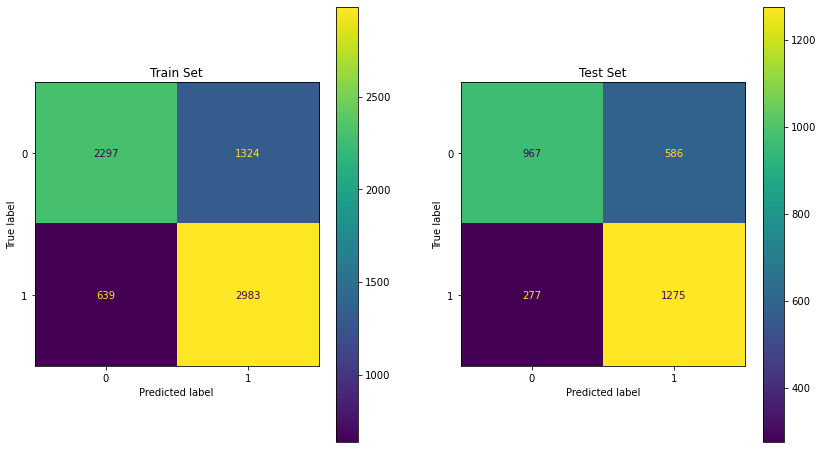

In [72]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [77]:
# After the upsampling we can see an improvement in Accuracy and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [78]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.72394755, 0.69565217, 0.73084886, 0.73411602, 0.74378453])